In [68]:
import pandas as pd
import geopandas as gpd

In [69]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [70]:
import os
os.listdir()

['Creating a world map.ipynb',
 'democracy-dictatorship.xlsx',
 '.ipynb_checkpoints']

In [90]:
df = pd.read_excel(os.listdir()[1])
df['Country'] = df['Country'].map(lambda x: x[1:])
df['Country'] = df['Country'].map(lambda x: x[1:] if x[1:] in ['Switzerland'] else x[2:] if x[2:] in ['Nepal'] else x)

In [91]:
df['Country'] = df['Country'].replace({'United States': 'United States of America',
                        'Bosnia and Herzegovina': 'Bosnia and Herz.',
                        'Dominican Republic': 'Dominican Rep.',
                        'Democratic Republic of the Congo': 'Dem. Rep. Congo',
                         'Republic of the Congo': 'Congo',
                        'Central African Republic': 'Central African Rep.',
                                      'Czech Republic': 'Czechia'})

In [111]:
def number_to_regime(number):
    """Map The Economist Intelligence Unit number to a regime type"""
    if number > 8:
        return 'Full democracy'
    elif number > 6:
        return 'Flawed democracy'
    elif number > 4:
        return 'Hybrid regime'
    elif number >= 0:
        return 'Authoritarian regime'
    else:
        raise ValueError('Data falls outside of the given value range')

In [112]:
df['regime_2015'] = df[2015].map(number_to_regime)

In [113]:
world_merged = world.merge(df, left_on = 'name', right_on = 'Country', how = 'left')

In [114]:
import matplotlib.pyplot as plt

In [115]:
world_merged = world_merged[~(world_merged['name'] == 'Antarctica')]

In [171]:
def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k,v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)

In [176]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [186]:
def plot_areas(world_merged, no_edges = True):
    """Plot the world in rural areas
    
    Args:
        world_merged (dataframe): dataframe containing geospatial data
        
    Returns:
        None
    """
    
    missing_kwds = dict(color='#D3D3D3', label='No Data')
    
    fig, ax = plt.subplots(1,1, figsize = (30,15))
    
            
    world_merged.plot(column='regime_2015',
                      ax = ax, 
                      legend = True,
                      edgecolor = 'none',
                      categorical=True,
                      cmap = 'cividis',
                      missing_kwds = missing_kwds)
    
    

    if no_edges:
        ax.axis('off')
        
    plt.subplots_adjust(top=0.7)
    fig.savefig('mapfig.png')
    plt.show()

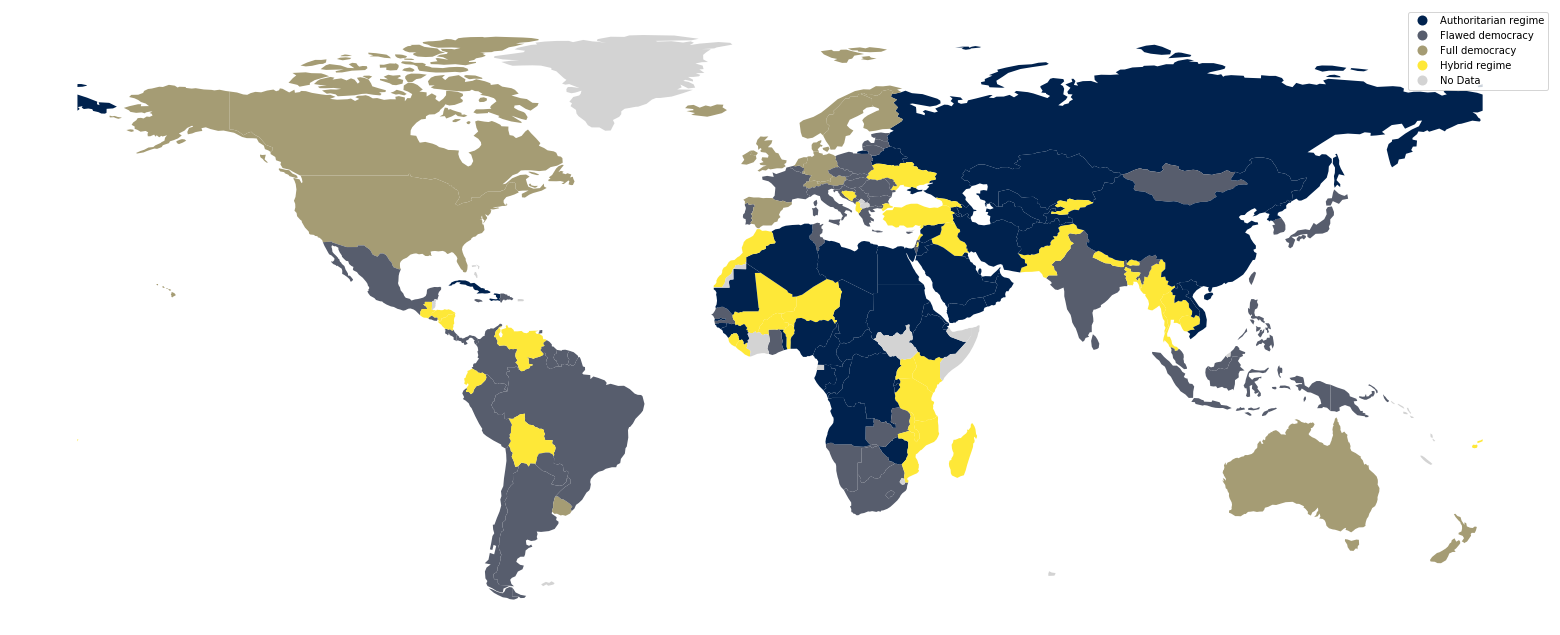

In [187]:
plot_areas(world_merged)

In [76]:
world_merged['individualism_index']

0       NaN
1      25.0
2      25.0
3      25.0
4      25.0
       ... 
872    16.0
873    16.0
874    16.0
875    16.0
876     NaN
Name: individualism_index, Length: 877, dtype: float64

In [79]:
world_merged['t'] = world_merged['individualism_index'].map(lambda x: -10 if pd.isnull(x) else x)

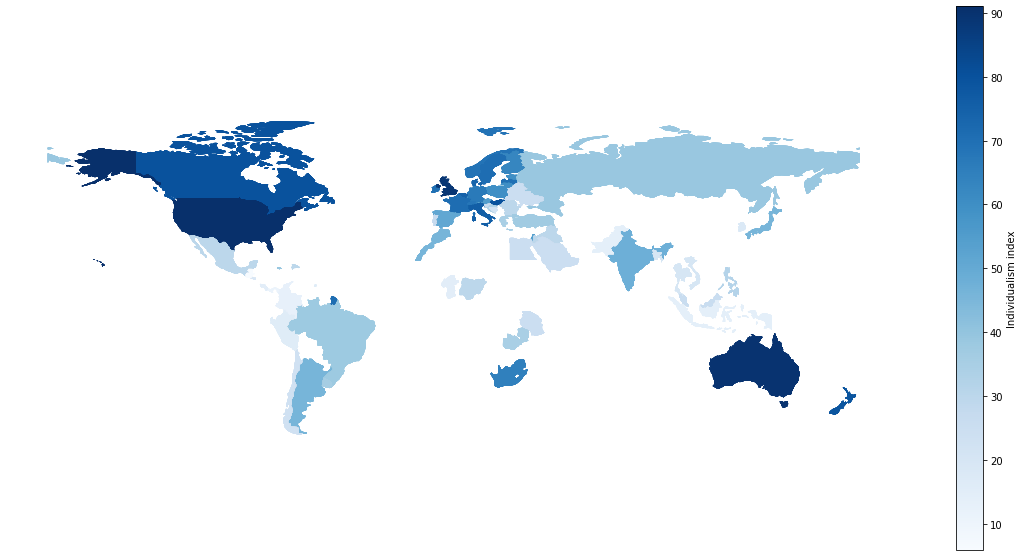

In [ ]:
def plot_areas(world_merged, no_edges = True):
    """Plot the world in rural areas
    
    Args:
        world_merged (dataframe): dataframe containing geospatial data
        
    Returns:
        None
    """
    
    missing_kwds = dict(color='#D3D3D3', label='No Data')
    
    fig, ax = plt.subplots(1,1, figsize = (30,15))
    
    world_merged.plot(column='regime_2015',
                      ax = ax, 
                      legend = True,
                      legend_kwds = {'label': 'Individualism index',
                                     'orientation': 'horizontal',
                                     'shrink': 0.4},
                      edgecolor = 'none',
                      cmap = 'Blues',
                      missing_kwds = missing_kwds)
    if no_edges:
        ax.axis('off')
        
    plt.subplots_adjust(top=0.7)
    fig.savefig('mapfig.png')